# Rabi 振荡

## 1. 二能级原子施加单光子驱动

哈密顿量，
$$
\hat H = \hbar \omega_q \hat a^\dagger \hat a + \hbar p(\hat a^\dagger e^{-i \omega_p t} + \hat a e^{i \omega_p t})
\tag{1}
$$

在驱动频率的 Rotating Frame 下，取 $\hbar=1$，哈密顿量为，
$$
\hat H_1 = \Delta \hat a^\dagger \hat a + p(\hat a^\dagger + \hat a)
\tag{2}
$$

其中 $\Delta=\omega_q - \omega_p$

### 1.1 Qutip 哈密顿量演化方法

In [1]:
from qutip import destroy, mesolve, basis
import numpy as np

In [2]:
# 定义常数(MHz)
delta = 200  # 失谐
p = 300  # 驱动强度

In [3]:
# 定义算符
N = 2  # 维度
a = destroy(N)
a_dag = a.dag()

# 定义二能级
state_0 = basis(N, 0)
state_1 = basis(N, 1)

In [4]:
# 定义哈密顿量
ham = delta * a_dag * a + p * (a_dag + a)

#### 哈密顿量演化

In [5]:
# 定义时间序列
t0 = 0  # 开始时间
tg = 2*np.pi / np.sqrt(delta ** 2 + 4* (p ** 2))  # 演化结束时间
tlist = np.linspace(t0, tg, 100)  # 时间序列

In [6]:
# 求解演化
# 初态：处于基态
initial_state = state_0
res = mesolve(ham, initial_state, tlist=tlist)

In [7]:
# 每一时刻的状态
res.states

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[ 9.99546900e-01+3.03129021e-06j]
  [-3.02041168e-04-3.00982449e-02j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[ 0.99818819+2.42477781e-05j]
  [-0.00120753-6.01570846e-02j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[ 0.99592566+8.17892568e-05j]
  [-0.00271445-9.01371883e-02j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[ 0.99276225+0.00019372j]
  [-0.00481947-0.11999935j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[ 0.98870212+0.00037797j]
  [-0.0075179 -0.14970454j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[ 0.98375058+0.00065232j]
  [-0.01080377-0.179214j  ]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj dat

In [8]:
# 计算每一时刻的布居概率
occ_0 = state_0.dag() * res.states
occ_1 = state_1.dag() * res.states
# 从 Array[Qobj] 提取出每一个时刻的布居数
occ_0[0].full()[0][0]

(1+0j)

In [9]:
# 将每一时刻的布居数转化为一个列表
occ_0 = [(np.abs(occ.full()[0][0]))**2 for occ in occ_0]
occ_1 = [(np.abs(occ.full()[0][0]))**2 for occ in occ_1]

In [10]:
occ_0

[1.0,
 0.9990940044260587,
 0.996379667043986,
 0.9918679190335259,
 0.9855769292350328,
 0.9775320309552067,
 0.967765619934866,
 0.9563170238719017,
 0.9432323440292834,
 0.9285642695690762,
 0.9123718653607876,
 0.8947203341190701,
 0.8756807538288626,
 0.8553297915154099,
 0.8337493945117328,
 0.8110264604667393,
 0.7872524874228213,
 0.7625232053754782,
 0.7369381907935898,
 0.7106004656496626,
 0.6836160825831132,
 0.6560936978644029,
 0.6281441338800596,
 0.5998799329007196,
 0.5714149039293114,
 0.5428636644541147,
 0.5143411789516541,
 0.48596229599712626,
 0.4578412858452952,
 0.4300913803425602,
 0.40282431702125343,
 0.3761498892102506,
 0.3501755039717455,
 0.32500574964268497,
 0.30074197472095954,
 0.27748187979112404,
 0.2553191241323025,
 0.23434294859219432,
 0.21463781624589592,
 0.1962830722868675,
 0.17935262452004996,
 0.16391464574421433,
 0.15003129922247238,
 0.13775848834686977,
 0.12714563150559394,
 0.11823546305998311,
 0.11106386123370791,
 0.1056597036061

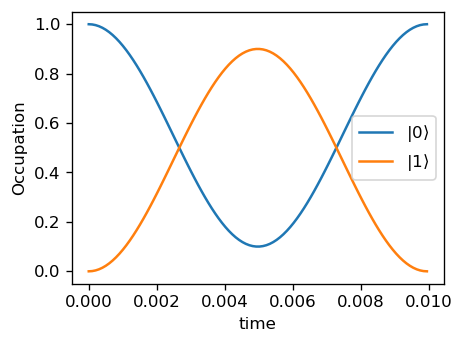

In [11]:
# 绘图
from matplotlib import pyplot as plt

plt.figure(figsize=(4, 3), dpi=120)

plt.plot(tlist, occ_0, label=r'$|0\rangle$')
plt.plot(tlist, occ_1, label=r'$|1\rangle$')

plt.legend()
plt.xlabel('time')
plt.ylabel('Occupation')

plt.show()

### 1.2 推导计算得到的布居分布

- 初态：$|0\rangle$

- 基态概率：
$$
|c_0(t)|^2 = 1-4\frac{p^2}{\Omega^2}\sin^2 \frac{\Omega t}{2}
$$

- 激发态概率：
$$
|c_1(t)|^2 = 1-|c_0(t)|^2
$$

其中，拉比振荡频率 $\Omega = \sqrt{\Delta^2 + 4p^2}$

In [12]:
# Rabi 频率
rabi_freq = np.sqrt(delta ** 2 + 4*p **2)

In [13]:
occ_0_cal = 1 - (4*p**2 / rabi_freq**2) * (np.sin(rabi_freq * tlist / 2))**2
occ_1_cal = 1 - occ_0_cal

In [14]:
occ_0_cal

array([1.        , 0.999094  , 0.99637967, 0.99186791, 0.98557692,
       0.977532  , 0.96776557, 0.95631694, 0.94323222, 0.92856409,
       0.91237162, 0.89472   , 0.87568032, 0.85532924, 0.8337487 ,
       0.81102561, 0.78725146, 0.76252198, 0.73693676, 0.7105988 ,
       0.68361417, 0.65609152, 0.62814168, 0.59987719, 0.57141186,
       0.54286032, 0.51433752, 0.48595832, 0.457837  , 0.43008678,
       0.40281942, 0.37614469, 0.35017002, 0.325     , 0.30073597,
       0.27747564, 0.25531267, 0.2343363 , 0.214631  , 0.19627611,
       0.17934554, 0.16390746, 0.15002405, 0.13775119, 0.12713832,
       0.11822816, 0.1110566 , 0.1056525 , 0.10203763, 0.10022656,
       0.10022656, 0.10203763, 0.1056525 , 0.1110566 , 0.11822816,
       0.12713832, 0.13775119, 0.15002405, 0.16390746, 0.17934554,
       0.19627611, 0.214631  , 0.2343363 , 0.25531267, 0.27747564,
       0.30073597, 0.325     , 0.35017002, 0.37614469, 0.40281942,
       0.43008678, 0.457837  , 0.48595832, 0.51433752, 0.54286

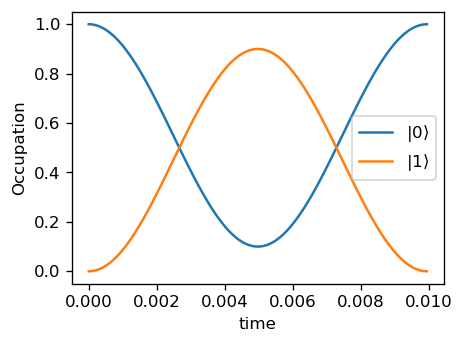

In [15]:
# 绘图
from matplotlib import pyplot as plt

plt.figure(figsize=(4, 3), dpi=120)

plt.plot(tlist, occ_0_cal, label=r'$|0\rangle$')
plt.plot(tlist, occ_1_cal, label=r'$|1\rangle$')

plt.legend()
plt.xlabel('time')
plt.ylabel('Occupation')

plt.show()

### Conclusion

- 利用哈密顿量演化计算的数值结果与解析解计算的结果相同
- 有失谐的情况会导致跃迁不充分，无法完全达到 $|1\rangle$ 态